In [1]:
print("hello world")

hello world


In [2]:
a=5
b=10
c=20
print(a+b+c)




35


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 4090.9408623494096
Iteration = 1, Loss = 1860.3389436294747
Iteration = 1, Loss = 848.312382294238
Iteration = 1, Loss = 389.1548103487322
Iteration = 2, Loss = 180.8345112698315
Iteration = 3, Loss = 86.31936072821614
Iteration = 4, Loss = 43.43773213324542
Iteration = 5, Loss = 23.982289636889654
Iteration = 6, Loss = 15.15533372128996
Iteration = 7, Loss = 11.150533939934379
Iteration = 8, Loss = 9.333551737909573
Iteration = 9, Loss = 8.509184794949359
Iteration = 10, Loss = 8.13516849449361
Iteration = 11, Loss = 7.965476779374384
Iteration = 12, Loss = 7.888487354945975
Iteration = 13, Loss = 7.85355706249018
Iteration = 14, Loss = 7.837709044802084
Iteration = 15, Loss = 7.830518676317719
Iteration = 16, Loss = 7.827256292871954
Iteration = 17, Loss = 7.825776040594308
Iteration = 18, Loss = 7.825104343206904
Iteration = 19, Loss = 7.8247994880740945
Iteration = 20, Loss = 7.824661069683827


ValueError: unknown file extension: .mp4

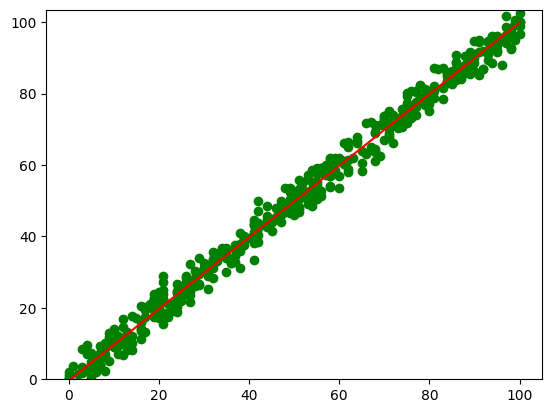

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

class LinearRegression:
	def __init__(self):
		self.parameters = {}

	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - \
			learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - \
			learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		# Initialize random parameters
		self.parameters['m'] = np.random.uniform(0, 1) * -1
		self.parameters['c'] = np.random.uniform(0, 1) * -1

		# Initialize loss
		self.loss = []

		# Initialize figure and axis for animation
		fig, ax = plt.subplots()
		x_vals = np.linspace(min(train_input), max(train_input), 100)
		line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
						self.parameters['c'], color='red', label='Regression Line')
		ax.scatter(train_input, train_output, marker='o',
				color='green', label='Training Data')

		# Set y-axis limits to exclude negative values
		ax.set_ylim(0, max(train_output) + 1)

		def update(frame):
			# Forward propagation
			predictions = self.forward_propagation(train_input)

			# Cost function
			cost = self.cost_function(predictions, train_output)

			# Back propagation
			derivatives = self.backward_propagation(
				train_input, train_output, predictions)

			# Update parameters
			self.update_parameters(derivatives, learning_rate)

			# Update the regression line
			line.set_ydata(self.parameters['m']
						* x_vals + self.parameters['c'])

			# Append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(frame + 1, cost))

			return line,
		# Create animation
		ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

		# Save the animation as a video file (e.g., MP4)
		ani.save('linear_regression_A.mp4', writer='ffmpeg')

		plt.xlabel('Input')
		plt.ylabel('Output')
		plt.title('Linear Regression')
		plt.legend()
		plt.show()

		return self.parameters, self.loss
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df=pd.read_csv("prices.csv")
df

,area,prices
0,2600,5500
1,3000,5650
2,3200,6100
3,3600,6800
4,4000,7250


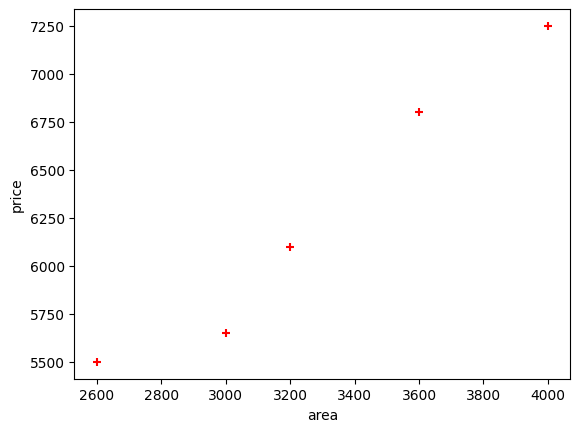

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.prices,color='red',marker='+')
            

In [6]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.prices)

LinearRegression()

In [8]:
reg.predict([[3400]])

C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6422.94520548])

In [9]:
reg.predict([[1200]])

C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3435.61643836])